<a href="https://colab.research.google.com/github/alisad68/My-Investigation/blob/main/C1_Computer_Vision_Horse_VS_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2023-05-04 17:52:57--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   112MB/s    in 1.3s    

2023-05-04 17:52:58 (112 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

total training horse images: 500
total training human images: 527


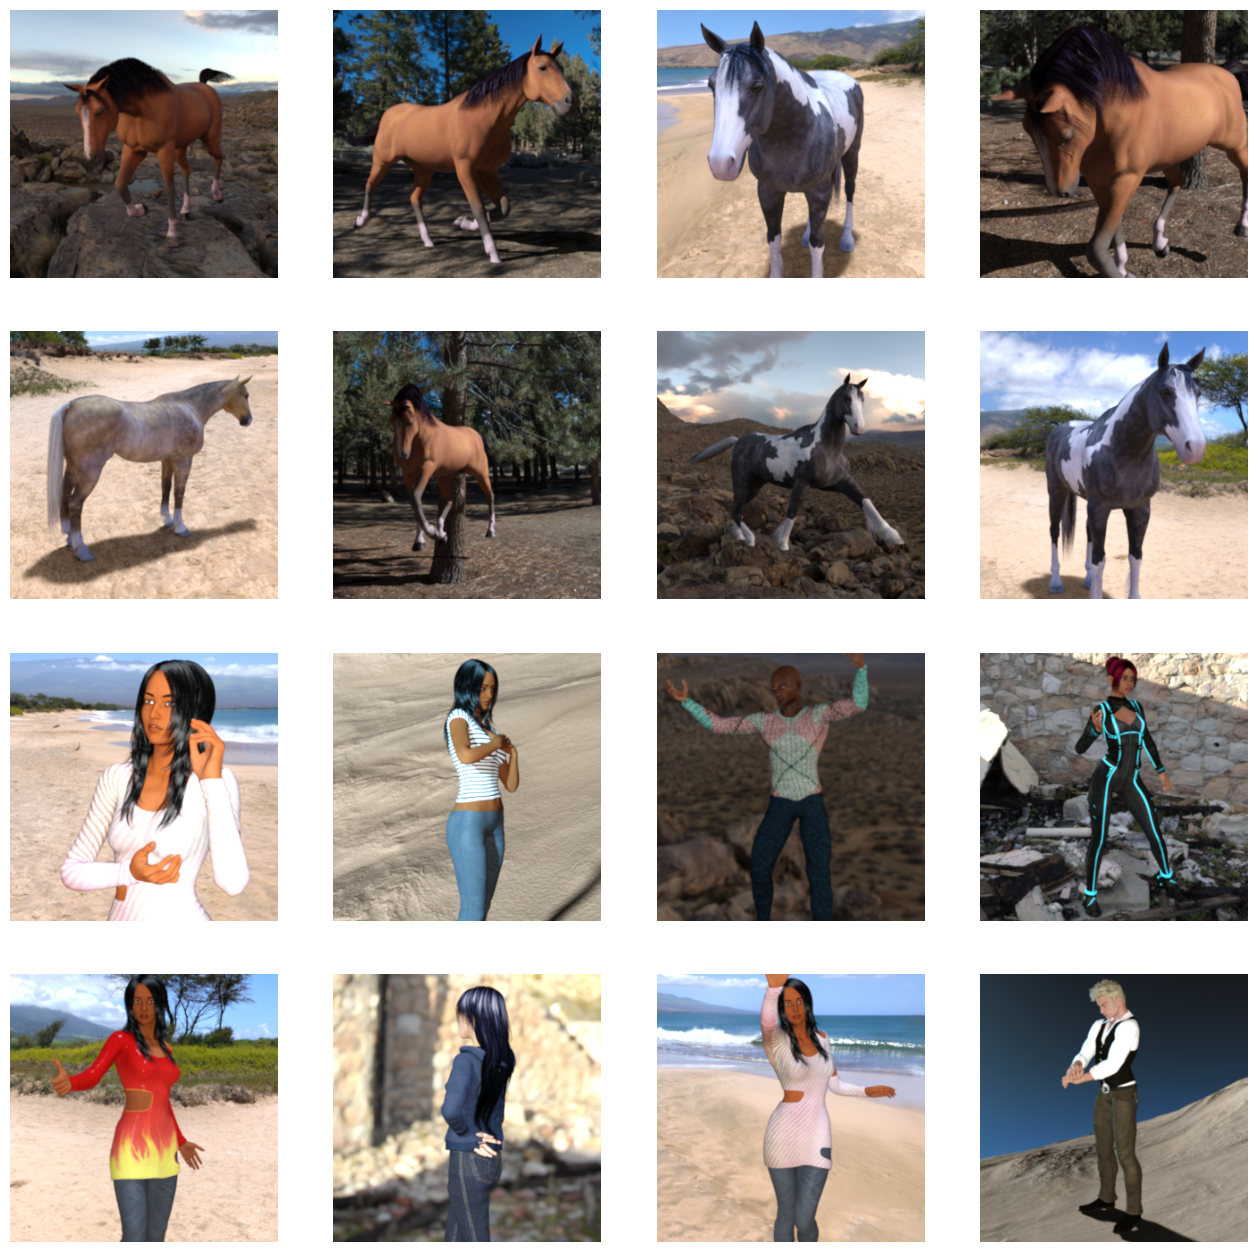

Found 1027 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 25s 725ms/step - loss: 1.0121 - accuracy: 0.5506
Epoch 2/15
8/8 [==============================] - 7s 895ms/step - loss: 0.6917 - accuracy: 0.7070
Epoch 3/15
8/8 [==============================] - 7s 809ms/step - loss: 0.5542 - accuracy: 0.7353
Epoch 4/15
8/8 [==============================] - 7s 887ms/step - loss: 0.4665 - accuracy: 0.8065
Epoch 5/15
8/8 [==============================] - 6s 764ms/step - loss: 0.4445 - accuracy: 0.8209
Epoch 6/15
8/8 [==============================] - 8s 993ms/step - loss: 0.2126 - accuracy: 0.9219
Epoch 7/15
8/8 [==============================] - 8s 954ms/step - loss: 0.4997 - accuracy: 0.8443
Epoch 8/15
8/8 [==============================] - 7s 827ms/step - loss: 0.1467 - accuracy: 0.9600
Epoch 9/15
8/8 [==============================] - 7s 815ms/step - loss: 0.0771 - accuracy: 0.9733
Epoch 10/15
8/8 [==============================] - 8s 937ms/step - loss: 0.

In [ ]:
## Downloading the compressed database
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

## Unzipping the dataset using zipfile module to the base directory (./horse-or-human)
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

## Defining sub-directories
import os
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

## Printing total number of Human and Horse images used for Training
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

## Displaying a few pictures to get a better sense of what they look like
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

## Defining the model architecture
import tensorflow as tf
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compiling the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

## Performing Data Preprocessing using ImageDataGenerator class 
## (Including Normalization, resizing of images to 300*300 and ...)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')
## Starting the Training
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

In [ ]:
## Performing Model Prediction. This code will allow you to choose 1 or more 
## files from your file system, upload them, and run them through the model, 
## giving an indication of whether the object is a horse or a human.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving hh4.jpg to hh4.jpg
1/1 [==============================] - 0s 327ms/step
[0.15153804]
hh4.jpg is a horse
